# 🛳️ Titanic - Análise Exploratória de Dados (EDA)

Este notebook tem como objetivo realizar uma análise exploratória inicial dos dados da competição **Titanic - Machine Learning from Disaster** do Kaggle.

Nesta competição, o desafio é prever a sobrevivência dos passageiros com base em atributos como sexo, idade, classe do bilhete, número de familiares a bordo, entre outros.

Vamos começar carregando os dados e explorando as principais dimensões do problema.


In [35]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# Configuração para exibir todas as colunas no Pandas
pd.set_option('display.max_columns', None)

# Ativar gráficos inline no notebook
%matplotlib inline


In [ ]:
from pathlib import Path
import pandas as pd

# Tenta alguns caminhos comuns (raiz, um nível acima, dois níveis acima)
candidatos = [Path("data"), Path("../data"), Path("../../data")]
DATA_DIR = next((p for p in candidatos if (p / "train.csv").exists()), None)

if not DATA_DIR:
    raise FileNotFoundError("Não encontrei train.csv em data/, ../data/ ou ../../data/. Verifique onde estão os CSVs.")

df_train = pd.read_csv(DATA_DIR / "train.csv")
df_test  = pd.read_csv(DATA_DIR / "test.csv")

print("Usando dados em:", DATA_DIR.resolve())
print("Shape train:", df_train.shape, "| Shape test:", df_test.shape)
df_train.head(20)


Usando dados em: C:\Users\Tuca Starling\TITANIC\data
Shape train: (891, 12) | Shape test: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [38]:
# Estrutura das colunas, tipos e nulos
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
# Estatísticas para variáveis numéricas e categóricas
df_train.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [40]:
# Contagem de valores ausentes por coluna
df_train.isnull().sum().sort_values(ascending=False)


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

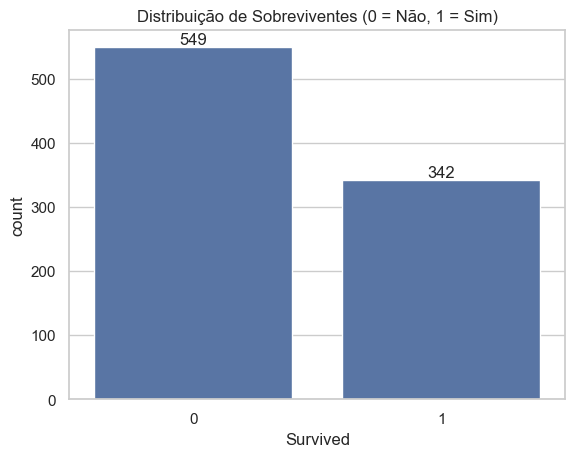

Survived
0    0.616
1    0.384
Name: proportion, dtype: float64

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(data=df_train, x='Survived')
ax.bar_label(ax.containers[0])
plt.title("Distribuição de Sobreviventes (0 = Não, 1 = Sim)")
plt.show()

# Proporção de sobreviventes
df_train['Survived'].value_counts(normalize=True).round(3)


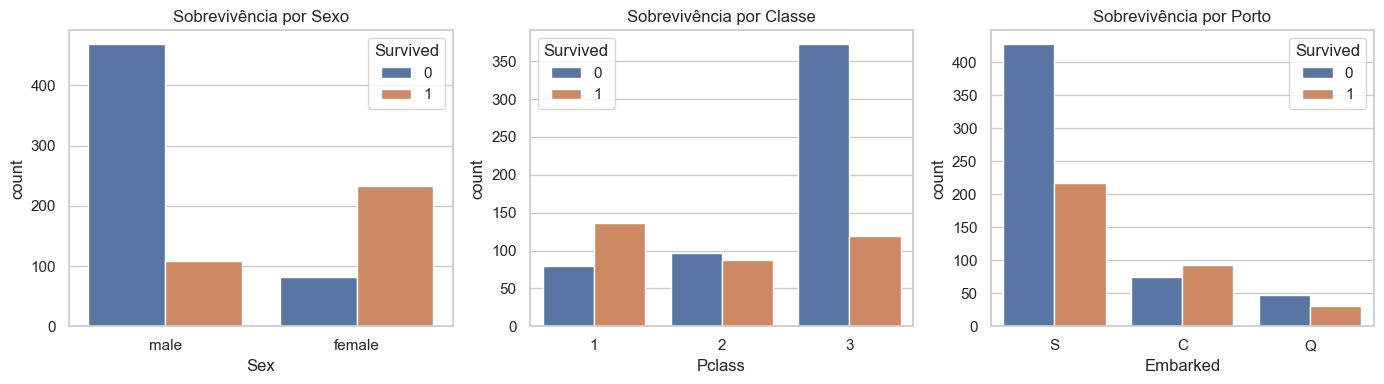

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.countplot(data=df_train, x="Sex", hue="Survived", ax=axes[0])
axes[0].set_title("Sobrevivência por Sexo")

sns.countplot(data=df_train, x="Pclass", hue="Survived", ax=axes[1])
axes[1].set_title("Sobrevivência por Classe")

sns.countplot(data=df_train, x="Embarked", hue="Survived", ax=axes[2])
axes[2].set_title("Sobrevivência por Porto")

plt.tight_layout()
plt.show()


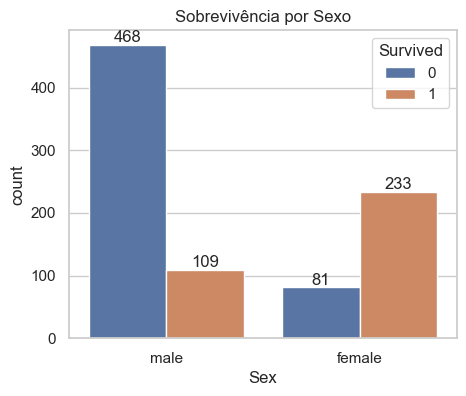

Sex
female    0.742
male      0.189
Name: Survived, dtype: float64


In [44]:
# Análise 1: Relação entre Sexo e Sobrevivência
# Objetivo: verificar se há diferença significativa na taxa de sobrevivência entre homens e mulheres.
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(data=df_train, x="Sex", hue="Survived", ax=ax)
ax.set_title("Sobrevivência por Sexo")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# Calcula a taxa de sobrevivência por sexo
survival_by_sex = df_train.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
print(survival_by_sex.round(3))


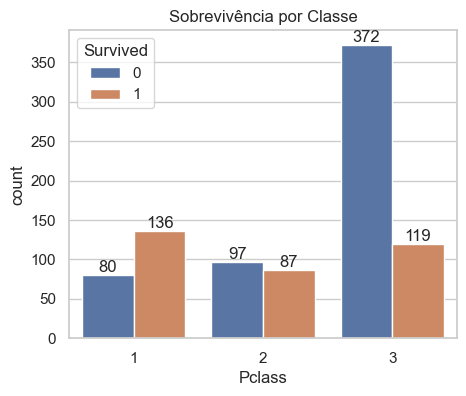

Pclass
1    0.630
2    0.473
3    0.242
Name: Survived, dtype: float64


In [45]:
# Análise 2: Relação entre Classe do bilhete e Sobrevivência
# Objetivo: entender se a classe (posição no navio e custo da passagem) influenciou o resgate.
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(data=df_train, x="Pclass", hue="Survived", ax=ax)
ax.set_title("Sobrevivência por Classe")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# Calcula a taxa de sobrevivência por classe
survival_by_pclass = df_train.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)
print(survival_by_pclass.round(3))


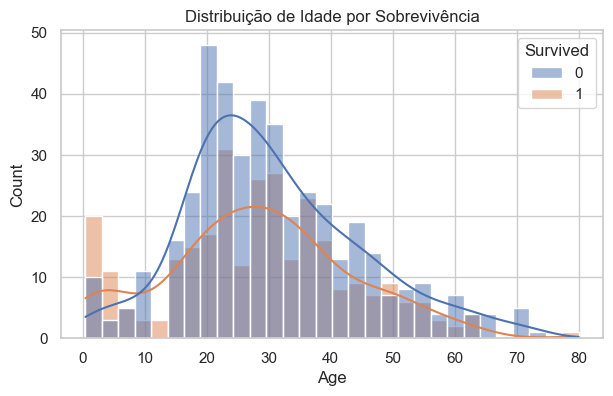

Survived
0    30.63
1    28.34
Name: Age, dtype: float64


In [46]:
# Análise 3: Relação entre Idade e Sobrevivência
# Objetivo: observar se crianças ou pessoas mais jovens tiveram mais chances de sobreviver.
fig, ax = plt.subplots(figsize=(7,4))
sns.histplot(data=df_train, x="Age", hue="Survived", kde=True, bins=30, ax=ax)
ax.set_title("Distribuição de Idade por Sobrevivência")
plt.show()

# Idade média dos sobreviventes e não sobreviventes
print(df_train.groupby("Survived")["Age"].mean().round(2))


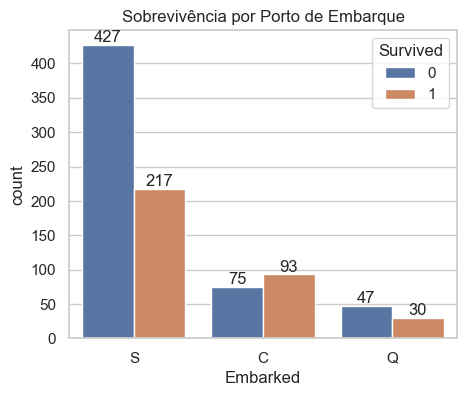

Embarked
C    0.554
Q    0.390
S    0.337
Name: Survived, dtype: float64


In [47]:
# Análise 4: Relação entre Porto de Embarque e Sobrevivência
# Objetivo: verificar se o local de embarque está relacionado a maior ou menor chance de sobrevivência.
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(data=df_train, x="Embarked", hue="Survived", ax=ax)
ax.set_title("Sobrevivência por Porto de Embarque")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

# Calcula a taxa de sobrevivência por porto de embarque
survival_by_embarked = df_train.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)
print(survival_by_embarked.round(3))


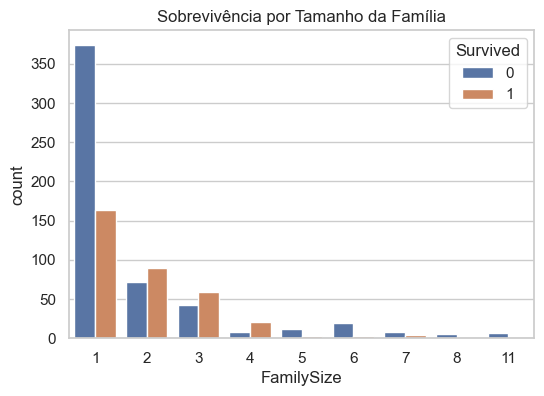

FamilySize
4     0.724
3     0.578
2     0.553
7     0.333
1     0.304
5     0.200
6     0.136
8     0.000
11    0.000
Name: Survived, dtype: float64


In [48]:
# Análise 5: Relação entre tamanho da família e Sobrevivência
# Objetivo: investigar se estar sozinho ou em família influenciou na chance de sobreviver.
# FamilySize = número de irmãos/cônjuges (SibSp) + pais/filhos (Parch) + o próprio passageiro
df_train["FamilySize"] = df_train["SibSp"] + df_train["Parch"] + 1

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_train, x="FamilySize", hue="Survived", ax=ax)
ax.set_title("Sobrevivência por Tamanho da Família")
plt.show()

# Calcula a taxa de sobrevivência por tamanho da família
survival_by_family = df_train.groupby("FamilySize")["Survived"].mean().sort_values(ascending=False)
print(survival_by_family.round(3))


In [49]:
# Cria DataFrames com as taxas de sobrevivência de cada variável analisada

# Sexo
sex_df = df_train.groupby("Sex")["Survived"].mean().reset_index()
sex_df.columns = ["Categoria", "Taxa_Sobrevivencia"]
sex_df["Variavel"] = "Sexo"

# Classe
pclass_df = df_train.groupby("Pclass")["Survived"].mean().reset_index()
pclass_df.columns = ["Categoria", "Taxa_Sobrevivencia"]
pclass_df["Variavel"] = "Classe"

# Faixa de idade (agrupada para ficar mais legível)
age_bins = pd.cut(df_train["Age"], bins=[0, 12, 18, 30, 50, 80])
age_df = df_train.groupby(age_bins)["Survived"].mean().reset_index()
age_df.columns = ["Categoria", "Taxa_Sobrevivencia"]
age_df["Variavel"] = "Faixa de Idade"

# Porto de embarque
embarked_df = df_train.groupby("Embarked")["Survived"].mean().reset_index()
embarked_df.columns = ["Categoria", "Taxa_Sobrevivencia"]
embarked_df["Variavel"] = "Porto de Embarque"

# Tamanho da família
family_df = df_train.groupby("FamilySize")["Survived"].mean().reset_index()
family_df.columns = ["Categoria", "Taxa_Sobrevivencia"]
family_df["Variavel"] = "Tamanho da Família"

# Junta tudo em um único DataFrame
comparativo_df = pd.concat([sex_df, pclass_df, age_df, embarked_df, family_df], ignore_index=True)

# Ordena por variável e taxa
comparativo_df = comparativo_df.sort_values(by=["Variavel", "Taxa_Sobrevivencia"], ascending=[True, False])

# Exibe a tabela final
comparativo_df.reset_index(drop=True, inplace=True)
comparativo_df


C:\Users\Tuca Starling\AppData\Local\Temp\ipykernel_14036\417888033.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_df = df_train.groupby(age_bins)["Survived"].mean().reset_index()


,Categoria,Taxa_Sobrevivencia,Variavel
0,1,0.629630,Classe
1,2,0.472826,Classe
2,3,0.242363,Classe
3,"(0, 12]",0.579710,Faixa de Idade
4,"(12, 18]",0.428571,Faixa de Idade
5,"(30, 50]",0.423237,Faixa de Idade
6,"(18, 30]",0.355556,Faixa de Idade
7,"(50, 80]",0.343750,Faixa de Idade
8,C,0.553571,Porto de Embarque
9,Q,0.389610,Porto de Embarque


C:\Users\Tuca Starling\AppData\Local\Temp\ipykernel_14036\2093405993.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


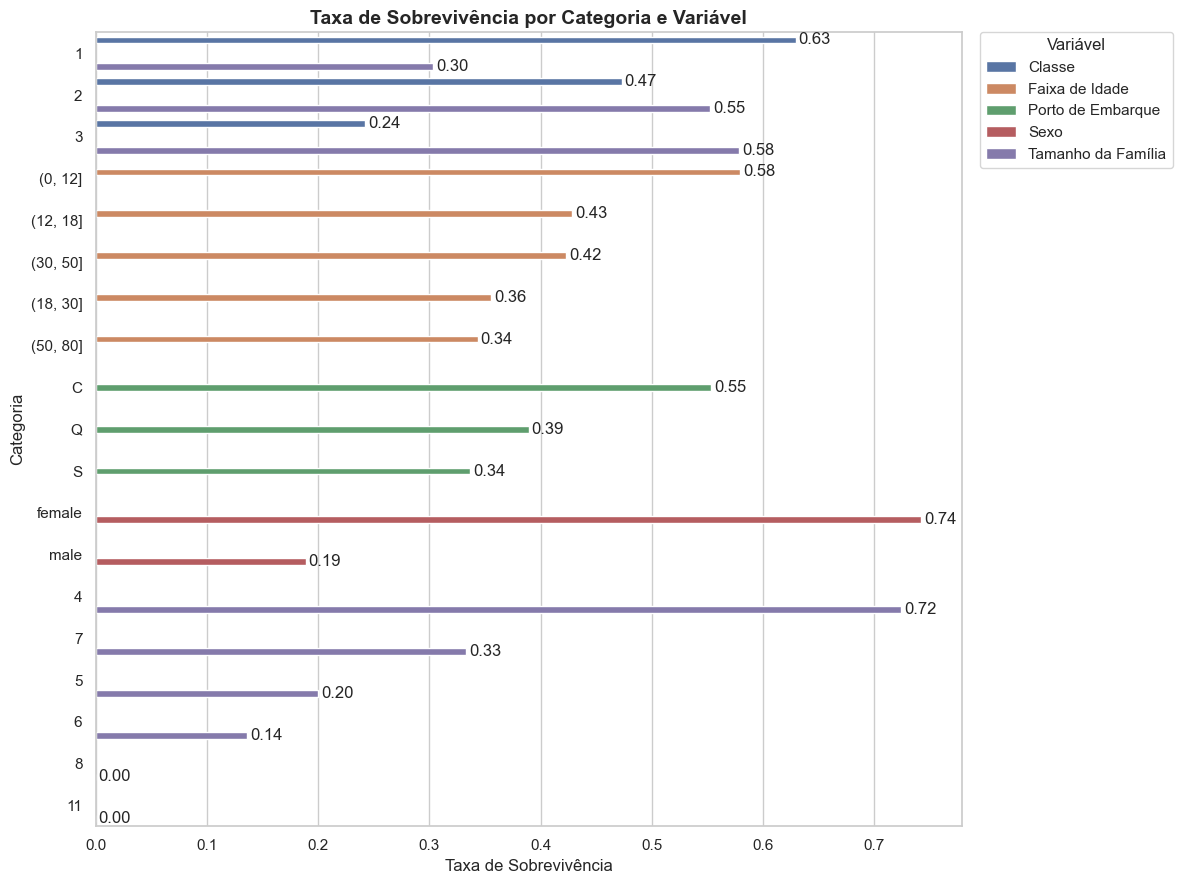

In [51]:
# Copia e normaliza tipos para o gráfico
comparativo_plot = comparativo_df.copy()
comparativo_plot["Categoria"] = comparativo_plot["Categoria"].astype(str)
comparativo_plot["Taxa_Sobrevivencia"] = comparativo_plot["Taxa_Sobrevivencia"].astype(float)

# Ordena dentro de cada variável pela taxa (desc)
comparativo_plot = comparativo_plot.sort_values(
    by=["Variavel", "Taxa_Sobrevivencia"],
    ascending=[True, False]
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
ax = sns.barplot(
    data=comparativo_plot,
    x="Taxa_Sobrevivencia",
    y="Categoria",
    hue="Variavel",
    ci=None
)

plt.title("Taxa de Sobrevivência por Categoria e Variável", fontsize=14, fontweight="bold")
plt.xlabel("Taxa de Sobrevivência")
plt.ylabel("Categoria")

# Legenda fora do gráfico
plt.legend(title="Variável", bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

# Rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", padding=2)

plt.tight_layout()
plt.show()


In [53]:
# Criamos cópias para não alterar os DataFrames originais
train = df_train.copy()
test  = df_test.copy()

# Função auxiliar: extrair Title do Name
def extract_title(name: str) -> str:
    # Ex.: "Braund, Mr. Owen Harris" -> "Mr"
    import re
    m = re.search(r",\s*([^\.]+)\.", name)
    return m.group(1).strip() if m else "Unknown"


In [54]:
# 1) Extrair Title de Name
for df in (train, test):
    df["Title"] = df["Name"].apply(extract_title)

# 2) Agrupar títulos raros (baixa frequência) em "Rare"
title_counts = train["Title"].value_counts()
rare_titles  = title_counts[title_counts < 10].index

for df in (train, test):
    df["Title_simplified"] = df["Title"].where(~df["Title"].isin(rare_titles), "Rare")

# Vistoria
train[["Name","Title","Title_simplified"]].head()


,Name,Title,Title_simplified
0,"Braund, Mr. Owen Harris",Mr,Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,Mrs
2,"Heikkinen, Miss. Laina",Miss,Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,Mrs
4,"Allen, Mr. William Henry",Mr,Mr


In [55]:
# 3) Preencher Embarked com a moda "S"
for df in (train, test):
    df["Embarked"] = df["Embarked"].fillna("S")

# Checar
train["Embarked"].isna().sum(), test["Embarked"].isna().sum()


(np.int64(0), np.int64(0))

In [56]:
# 4) Idade: mediana por grupo (Pclass, Sex, Title_simplified) calculada no TREINO
age_medians = (train
               .groupby(["Pclass","Sex","Title_simplified"])["Age"]
               .median())

def impute_age(row, medians, global_median):
    if pd.isna(row["Age"]):
        key = (row["Pclass"], row["Sex"], row["Title_simplified"])
        return medians.get(key, global_median)
    return row["Age"]

global_age_median = train["Age"].median()

for df in (train, test):
    df["Age"] = df.apply(impute_age, axis=1, medians=age_medians, global_median=global_age_median)

# Checar nulos restantes em Age
train["Age"].isna().sum(), test["Age"].isna().sum()


(np.int64(0), np.int64(0))

In [57]:
# 5) Fare: manter; se houver nulo no TESTE, imputar pela mediana da Pclass
if test["Fare"].isna().any():
    fare_by_pclass = train.groupby("Pclass")["Fare"].median()
    test["Fare"] = test.apply(
        lambda r: fare_by_pclass.loc[r["Pclass"]] if pd.isna(r["Fare"]) else r["Fare"],
        axis=1
    )

# Checar nulos em Fare
train["Fare"].isna().sum(), test["Fare"].isna().sum()


(np.int64(0), np.int64(0))

In [58]:
# 6) Remover colunas pouco úteis conforme combinado
cols_to_drop = ["Cabin", "Ticket"]
for df in (train, test):
    df.drop(columns=cols_to_drop, inplace=True, errors="ignore")

# Opcional: já que extraímos Title, podemos remover Name para simplificar
# (descomente se desejar)
# for df in (train, test):
#     df.drop(columns=["Name"], inplace=True, errors="ignore")

train.columns, test.columns


(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Fare', 'Embarked', 'Title', 'Title_simplified'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Title', 'Title_simplified'],
       dtype='object'))

In [59]:
# 7) Tamanho da família
for df in (train, test):
    df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

train[["SibSp","Parch","FamilySize"]].head()


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [60]:
print("Nulos no TREINO:")
display(train.isna().sum().sort_values(ascending=False))

print("Nulos no TESTE:")
display(test.isna().sum().sort_values(ascending=False))

print("Preview (train):")
display(train.head())

print("Shapes finais:", train.shape, test.shape)


Nulos no TREINO:


PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
Title               0
Title_simplified    0
FamilySize          0
dtype: int64

Nulos no TESTE:


PassengerId         0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Fare                0
Embarked            0
Title               0
Title_simplified    0
FamilySize          0
dtype: int64

Preview (train):


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_simplified,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,Mr,1


Shapes finais: (891, 13) (418, 12)


In [61]:
# Target e seleção de colunas
target = "Survived"

# Podemos remover 'Name' (já extraímos Title_simplified) e 'PassengerId' (id)
cols_drop = ["Survived", "PassengerId", "Name", "Title", "Ticket", "Cabin"]  # algumas podem já ter sido removidas
X = train.drop(columns=[c for c in cols_drop if c in train.columns], errors="ignore").copy()
y = train[target].copy()

# Confere o que sobrou em X
X.columns.tolist()


['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'Title_simplified',
 'FamilySize']

In [62]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define listas de variáveis numéricas e categóricas
numeric_features = ["Pclass", "Age", "SibSp", "Parch", "Fare", "FamilySize"]
categorical_features = ["Sex", "Embarked", "Title_simplified"]

# Pré-processamento:
# - Numéricas: StandardScaler (bom para modelos lineares)
# - Categóricas: One-Hot Encoder (handle_unknown='ignore' evita erro com categorias novas no teste)
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_features),
    ],
    remainder="drop"
)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd

# Define modelos para comparar
models = {
    "LogReg": LogisticRegression(max_iter=1000, n_jobs=None),
    "RandomForest": RandomForestClassifier(
        n_estimators=400, max_depth=None, min_samples_leaf=1, random_state=42
    ),
    "GradBoost": GradientBoostingClassifier(random_state=42)
}

# Avaliação com K-Fold estratificado
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
for name, clf in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", clf)])
    scores = cross_val_score(pipe, X, y, cv=cv, scoring="accuracy", n_jobs=-1)
    results.append({"modelo": name, "acc_mean": scores.mean(), "acc_std": scores.std(), "scores": scores})

# Tabela de comparação
cmp_df = pd.DataFrame([{k: v for k, v in r.items() if k != "scores"} for r in results]).sort_values("acc_mean", ascending=False)
cmp_df.reset_index(drop=True, inplace=True)
cmp_df


,modelo,acc_mean,acc_std
0,GradBoost,0.836112,0.017405
1,LogReg,0.835007,0.012220
2,RandomForest,0.821543,0.013079


In [64]:
# Identifica o melhor modelo pela média de acurácia
best_name = cmp_df.loc[0, "modelo"]
best_clf = models[best_name]
print(f"Melhor modelo (CV): {best_name}")

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report

best_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", best_clf)])

# Predição out-of-fold para análise de erros
y_pred_cv = cross_val_predict(best_pipe, X, y, cv=cv, method="predict")

cm = confusion_matrix(y, y_pred_cv)
print("Matriz de confusão (cross-val):\n", cm)
print("\nRelatório de classificação (cross-val):\n", classification_report(y, y_pred_cv, digits=3))


Melhor modelo (CV): GradBoost
Matriz de confusão (cross-val):
 [[500  49]
 [ 97 245]]

Relatório de classificação (cross-val):
               precision    recall  f1-score   support

           0      0.838     0.911     0.873       549
           1      0.833     0.716     0.770       342

    accuracy                          0.836       891
   macro avg      0.835     0.814     0.822       891
weighted avg      0.836     0.836     0.833       891



In [65]:
from pathlib import Path

# Recria X_test com as mesmas colunas (espelho de X)
X_test = test.drop(columns=[c for c in ["PassengerId", "Name", "Title", "Ticket", "Cabin"] if c in test.columns], errors="ignore").copy()

# Ajusta o pipeline no dataset completo de treino
final_pipe = Pipeline(steps=[("preprocess", preprocess), ("model", best_clf)])
final_pipe.fit(X, y)

# Predição no conjunto de teste
test_pred = final_pipe.predict(X_test).astype(int)

# Cria a submissão
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"].values,
    "Survived": test_pred
})

# Garante a pasta de saída
Path("outputs").mkdir(parents=True, exist_ok=True)
submission_path = Path("outputs/submission_baseline.csv")
submission.to_csv(submission_path, index=False)

submission.head(), submission_path.as_posix()


(   PassengerId  Survived
 0          892         0
 1          893         0
 2          894         0
 3          895         0
 4          896         0,
 'outputs/submission_baseline.csv')

In [66]:
import numpy as np

# Obter nomes de features após o preprocess
ohe = final_pipe.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
feature_names = np.concatenate([numeric_features, cat_feature_names])

model = final_pipe.named_steps["model"]

if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    fi = pd.DataFrame({"feature": feature_names, "importance": importances}).sort_values("importance", ascending=False)
    display(fi.head(15))
elif hasattr(model, "coef_"):
    coefs = model.coef_.ravel() if model.coef_.ndim > 1 else model.coef_
    cd = pd.DataFrame({"feature": feature_names, "coef": coefs}).sort_values("coef", ascending=False)
    display(cd.head(15))
    display(cd.tail(15))
else:
    print("O modelo escolhido não expõe importâncias/coeficientes diretamente.")


,feature,importance
13,Title_simplified_Mr,0.339641
4,Fare,0.165014
0,Pclass,0.125757
1,Age,0.097144
7,Sex_male,0.095906
5,FamilySize,0.068897
6,Sex_female,0.036554
15,Title_simplified_Rare,0.026773
11,Title_simplified_Master,0.016653
10,Embarked_S,0.012342
